In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

import plotly.express as px

In [3]:
oil_df = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
holidays_events_df= pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
stores_df= pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
train_df= pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
test_df= pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
transactions_df= pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")

In [4]:
print("Oil DF : ",list(oil_df.columns))
print("Holidays Events DF : ",list(holidays_events_df.columns))
print("Stores DF",list(stores_df.columns))
print("Train DF : ",list(train_df.columns))
print("Test DF : ", list(test_df.columns))
print("Transactions DF : ",list(transactions_df.columns))
      


Oil DF :  ['date', 'dcoilwtico']
Holidays Events DF :  ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
Stores DF ['store_nbr', 'city', 'state', 'type', 'cluster']
Train DF :  ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
Test DF :  ['id', 'date', 'store_nbr', 'family', 'onpromotion']
Transactions DF :  ['date', 'store_nbr', 'transactions']


date           0
dcoilwtico    43
dtype: int64
        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000


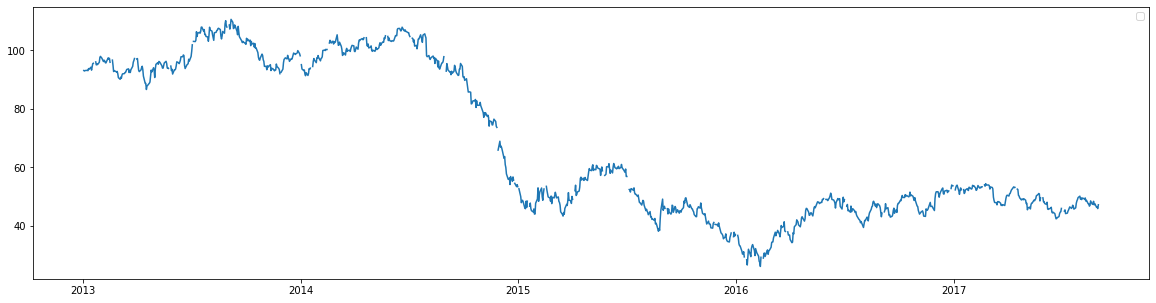

In [5]:
oil_df["date"] = pd.to_datetime(oil_df["date"])
print(oil_df.isna().sum())
print(oil_df.describe())
oil_df.head()

plt.plot(oil_df.date,oil_df.dcoilwtico)
plt.legend()
plt.show()

fig = px.line(oil_df, y="dcoilwtico", x="date", title='oil data')
fig.show()

In [6]:
print(holidays_events_df.isna().sum())
print(holidays_events_df.describe())
holidays_events_df.head()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
print(stores_df.isna().sum())
print(stores_df.describe())
stores_df.head()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
       store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
print(transactions_df.isna().sum())
print(transactions_df.describe())
transactions_df.head()

date            0
store_nbr       0
transactions    0
dtype: int64
          store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.000000   1393.000000
75%       40.000000   2079.000000
max       54.000000   8359.000000


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
print(train_df.isna().sum())
print(train_df.describe())
train_df.head()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [10]:
print(test_df.isna().sum())
print(test_df.describe())
test_df.head()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000    646.000000


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
